# 山河事件簿分析工具
riverlog_for_gis.py 需要在同一個目錄

文件請參閱:

https://docs.google.com/document/d/1iM_-YdZ8LFFbPkcL-4Irp9Z0laTXgUL2MzfwE4SWtFQ/edit#heading=h.lumlll4mf62a

In [186]:
from riverlog_for_gis import * 

# 多水庫庫容百分比分析
## Get/Load Data
需要的時間範圍可以在此設定

In [ ]:
df_info = api_to_csv("reservoir-info",None)
filename=api_to_csv_range("2021-01-01","2021-06-06","reservoir-reservoirData",None,"ObservationTime")
dest_name="%s_GMT8.csv" %(filename[:-4])
df=csv_add_gmt8(filename,"ObservationTime", dest_name )

## Handle info

In [188]:
df_info=df_info[df_info['Year']==105]
df_info.drop_duplicates(subset="id")
df_info["id"] = pd.to_numeric(df_info["id"])

## Merge/Filter
需要的水庫可以在此設定

In [194]:
df2=df.merge(df_info, how='left', left_on='ReservoirIdentifier', right_on='id')
df2=df2.drop_duplicates(subset=["ObservationTime","ReservoirIdentifier"],keep='last')
df2=df2[df2['ReservoirIdentifier'].isin([10405,10201,10205])]

## Calculate, Pivot

In [195]:
df2["ObservationTimeGMT8"] = pd.to_datetime(df2['ObservationTimeGMT8'])
df2['percent']=df2['EffectiveWaterStorageCapacity']/df2['EffectiveCapacity']*100
df2=df2[df2['percent']<=100]
df3 = df2.pivot(index='ObservationTimeGMT8', columns='ReservoirName', values='percent')

## Plot

<IPython.core.display.Javascript object>


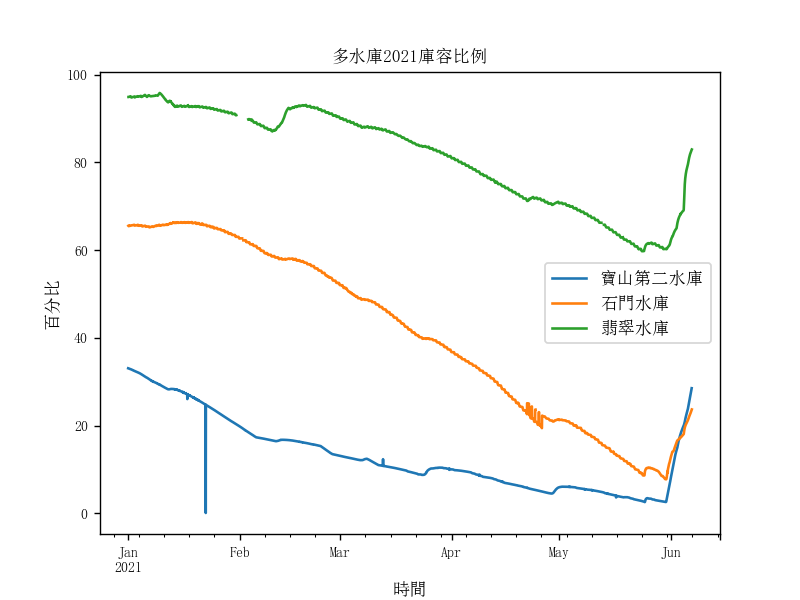

<function matplotlib.pyplot.show(block=None)>

In [196]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'/Library/Fonts/Microsoft/SimSun.ttf')
df3.plot()
plt.title("多水庫2021庫容比例",fontproperties=myfont) 
plt.legend(prop=myfont)
plt.xticks(fontname = 'SimSun',size=8)
plt.yticks(fontname = 'SimSun',size=8)
plt.xlabel('時間',fontproperties=myfont)
plt.ylabel('百分比',fontproperties=myfont)
plt.show

## DEBUG

In [117]:
#df=df.astype({'ReservoirIdentifier': object})
#df_info=df_info.astype({'id': int64})
#df3.dtypes

In [ ]:
#df2.plot.line(x=df2["ObservationTimeGMT8"],y='WaterLevel')
#df2.ObservationTimeGMT8 = pd.to_datetime(df2.ObservationTimeGMT8).dt.time
#df2.set_index('Time').plot()
df2["ObservationTimeGMT8"] = pd.to_datetime(df2['ObservationTimeGMT8'])
df2['percent']=df2['EffectiveWaterStorageCapacity']/3147.18*100
df2.plot(x="ObservationTimeGMT8", y=["percent"])
plt.show()

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'/Library/Fonts/Microsoft/SimSun.ttf')
df2.plot(x='ObservationTimeGMT8',y='WaterLevel') #line type have problem
#plt.title("排放量按主要都市分",fontproperties=myfont) 
#plt.xlabel('縣市',fontproperties=myfont)
#plt.ylabel('公噸',fontproperties=myfont)
#plt.legend(prop=myfont)
#plt.xticks(fontname = 'SimSun',size=8)
#plt.yticks(fontname = 'SimSun',size=8)
plt.show()

# 今日淹水

可看今天有哪些測站有淹過水

In [286]:
from datetime import date
today_str = date.today() # 2021-06-07
print("Today is %s" %(today_str))
df = api_to_csv("flood-floodData",[today_str])
df_info=api_to_csv("flood-station",None)
df["timeGMT8"] = df['time'].apply(date_to_gmt8)
df["timeGMT8"] = pd.to_datetime(df['timeGMT8'])

df=df.merge(df_info, how='left', left_on='stationID', right_on='_id')
df=df.drop_duplicates(subset=["time","stationName"],keep='last')   

df=df[df['value']>5] #可改淹水高度
df.sort_values(by=['timeGMT8'])

Today is 2021-06-07
flood-floodData: output/flood-floodData_2021-06-07.csv saved, shape = (41183, 3)
flood-station: output/flood-station.csv saved, shape = (1269, 4)


,stationID,time,value,timeGMT8,_id,lat,lng,stationName
0,ead17bf4-c66a-461f-a87e-96d548fc1461,2021-06-06T16:00:00.000Z,5.800000,2021-06-07 00:00:00,ead17bf4-c66a-461f-a87e-96d548fc1461,23.672219,120.350478,108P023土庫埤腳里霹靂布袋戲
15,8df6260d-8775-43fb-a0c1-f48716bc80d2,2021-06-06T16:00:00.000Z,2.214158,2021-06-07 00:00:00,8df6260d-8775-43fb-a0c1-f48716bc80d2,23.712486,120.349644,107P001土庫西平里山子腳
68,6a670556-99ea-447d-8b03-8069038cde2e,2021-06-06T16:00:00.000Z,6.200000,2021-06-07 00:00:00,6a670556-99ea-447d-8b03-8069038cde2e,23.686769,120.358956,108P015土庫崙內里昇嶠博美犬舍
105,77942a01-0ab7-4486-9f8a-5190e01bc57b,2021-06-06T16:00:00.000Z,0.687000,2021-06-07 00:00:00,77942a01-0ab7-4486-9f8a-5190e01bc57b,23.193491,120.229933,小埤里普庵宮旁
128,bf07bd52-1075-4825-a54c-9d9b2d98b975,2021-06-06T16:00:00.000Z,0.687000,2021-06-07 00:00:00,bf07bd52-1075-4825-a54c-9d9b2d98b975,23.196272,120.227938,埤頭里永安宮前
322,721f53e9-0ebd-4c29-b753-9ce4ffe6177b,2021-06-06T16:00:00.000Z,4.800000,2021-06-07 00:00:00,721f53e9-0ebd-4c29-b753-9ce4ffe6177b,23.544333,120.189031,108P057口湖梧南村宜梧順天宮管理委員會
462,ff0625dc-e998-4cbe-b621-e8f9db7e31bc,2021-06-06T16:00:00.000Z,10.000000,2021-06-07 00:00:00,ff0625dc-e998-4cbe-b621-e8f9db7e31bc,23.213855,120.237627,北勢南57涵洞站(淹水站76)
911,ff0625dc-e998-4cbe-b621-e8f9db7e31bc,2021-06-06T16:10:00.000Z,10.000000,2021-06-07 00:10:00,ff0625dc-e998-4cbe-b621-e8f9db7e31bc,23.213855,120.237627,北勢南57涵洞站(淹水站76)
736,721f53e9-0ebd-4c29-b753-9ce4ffe6177b,2021-06-06T16:10:00.000Z,4.700000,2021-06-07 00:10:00,721f53e9-0ebd-4c29-b753-9ce4ffe6177b,23.544333,120.189031,108P057口湖梧南村宜梧順天宮管理委員會
477,bf07bd52-1075-4825-a54c-9d9b2d98b975,2021-06-06T16:10:00.000Z,0.683000,2021-06-07 00:10:00,bf07bd52-1075-4825-a54c-9d9b2d98b975,23.196272,120.227938,埤頭里永安宮前


<IPython.core.display.Javascript object>


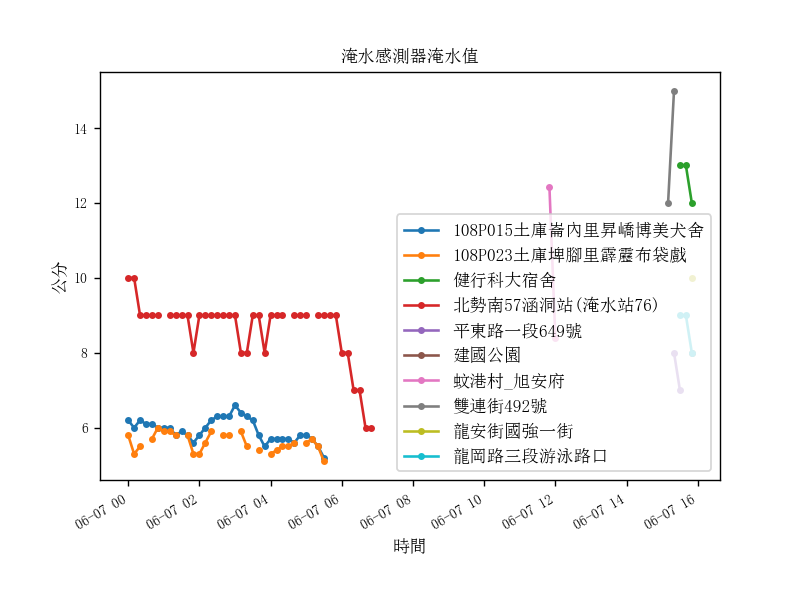

<function matplotlib.pyplot.show(block=None)>

In [276]:
%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'/Library/Fonts/Microsoft/SimSun.ttf')
df2 = df.pivot(index='timeGMT8', columns='stationName', values='value')
df2.plot(style='.-')
plt.title("淹水感測器淹水值",fontproperties=myfont) 
plt.legend(prop=myfont)
plt.xticks(fontname = 'SimSun',size=8)
plt.yticks(fontname = 'SimSun',size=8)
plt.xlabel('時間',fontproperties=myfont)
plt.ylabel('公分',fontproperties=myfont)
plt.show

## 淹水測站列表

目前條件下的測站列表

In [283]:
ary = df['stationName'].unique()
for name in ary:
    print(name)

108P023土庫埤腳里霹靂布袋戲
107P001土庫西平里山子腳
108P015土庫崙內里昇嶠博美犬舍
小埤里普庵宮旁
埤頭里永安宮前
108P057口湖梧南村宜梧順天宮管理委員會
北勢南57涵洞站(淹水站76)
楊賢村_自強大橋
歡喜鎮大樓
蚊港村_旭安府
崙東村_明仁路
恆春鎮_湖內路
107Q011布袋考試里鹿寮
小東地下道(淹水站22)
中正路一段高速公路下(淹水站29)
大昌路
富華街-1
中豐路山頂段244號
雙連街492號
龍泉街137巷88號
平東路一段649號
南平路215號
健行科大宿舍
環南路-2
龍慈路龍和三街口
長興路
龍岡路三段游泳路口
大湳水上樂園
士校大池-1
環中東路666號
中油三富站
龍江路61號
中山東路三段18號
龍崗國小-2
龍岡國小-1
中華路普忠路-2
信義街
興仁路二段57號
桃鶯路昆明路
龍安街國強一街
富裕街
建國公園
中山路裕和街口
大牛欄14A
樹仁三街-2
福德一路48號
樹仁三街218號
漢中路119巷26弄34號


## Debug

In [284]:
df_info

,_id,lat,lng,stationName
0,e051e3f1-3eb6-456b-8342-c2b267bdd245,21.991880,120.747430,恆春鎮_湖內路
1,b2c643f4-3f68-47d8-83b0-d3f3159e27df,23.517956,120.228886,107P007水林松中村蔦松
2,b2773745-9077-4bcb-b15d-9dcb8a2fed19,23.433920,120.240089,107Q007朴子竹村里鴨母寮
3,9debacd7-d006-4759-9b27-8fa143650457,22.369770,120.591330,枋寮鄉_枋寮高中
4,ae0652cb-2f34-4a47-ab20-a91845ac6774,22.465690,120.463080,東港鎮_東港派出所
5,45599982-f82d-4ba2-ac5c-7f23d2d3ce6e,24.845500,120.940500,舊港島淹水感測站
6,e040cbc5-e893-4a32-b3e1-e5b3232b00e6,23.500508,120.341948,107Q004太保舊埤里勞工住宅
7,eb0ad138-6444-4ee3-be9c-b1a2fc26b333,23.342240,120.195540,107Q012義竹北華村北華
8,be815803-90fb-48b5-9558-4355c5b3f63d,23.578457,120.171781,107P006口湖蚵寮村箔子寮
9,c5bc815d-8883-456e-b723-f5c3ae3793c7,22.430165,120.528104,羌光橋
